# Python for Finance - part 6

#### 금융분석과 관련된 기본적인 내용을 정리하였습니다. 파이썬을 활용한 금융분석 (이브 힐피시 지음)을 참고하였습니다.

## Chapter 10 확률과정
#### 난수 생성 : 모든 시뮬레이션 작업의 근간, 소볼 순열에 기반한 준-난수가 점점 많이 사용되고 있지만 일반적인 의사 난수가 여전히 주된 방법
#### 시뮬레이션 : 확률 변수의 시뮬레이션과 확률 과정의 시뮬레이션
#### 가치 평가 : 유러피안 / 아메리칸
#### 위험 측도 : VaR. CVaR, CVA

### 10.1 난수 생성

In [1]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt

In [2]:
npr.rand(10)

array([0.44598421, 0.11672444, 0.2662171 , 0.60438093, 0.43771091,
       0.96936669, 0.97830168, 0.09721326, 0.39404473, 0.38401458])

In [3]:
npr.rand(5,5)


array([[0.12290785, 0.4802509 , 0.15260463, 0.96683714, 0.97396393],
       [0.92177379, 0.48936721, 0.45363862, 0.1374281 , 0.45777643],
       [0.02838088, 0.32243464, 0.40414144, 0.01314405, 0.828972  ],
       [0.37487044, 0.95132544, 0.20345233, 0.59065931, 0.71701532],
       [0.76793964, 0.61398673, 0.37050307, 0.92102175, 0.87236107]])

In [4]:
a = 5.
b = 10.
npr.rand(10) * (b-a) + a

array([8.89095933, 5.56417793, 5.1918185 , 5.18735888, 6.30638082,
       8.20034281, 5.03421819, 5.61727912, 8.52541749, 5.38202362])

In [6]:
npr.rand(5,5) * (b-a) + a

array([[8.03608675, 5.13678736, 6.95834879, 5.02783678, 9.95340664],
       [5.01081025, 9.82769507, 7.56256158, 9.59014955, 5.16256723],
       [7.4132656 , 5.19611235, 8.4081669 , 5.9823888 , 6.6532341 ],
       [8.99388357, 7.34773518, 7.26998598, 9.02269574, 9.20116957],
       [9.98846157, 9.15064057, 7.57496116, 7.34006676, 5.56993854]])

In [7]:
sample_size = 50
rn1 = npr.rand(sample_size, 3)
rn2 = npr.randint(0, 10, sample_size)
rn3 = npr.sample(size = sample_size)
a = [0, 25, 50, 75, 100]
rn4 = npr.choice(a, size=sample_size)

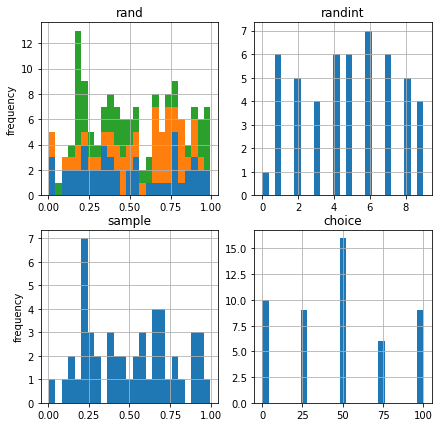

In [8]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (7,7))

ax1.hist(rn1, bins=25, stacked =True)
ax1.set_title('rand')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2, bins=25)
ax2.set_title('randint')
ax2.grid(True)

ax3.hist(rn3, bins=25)
ax3.set_title('sample')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4, bins=25)
ax4.set_title('choice')
ax4.grid(True)

In [9]:
sample_size = 500
rn1 = npr.standard_normal(sample_size)
rn2 = npr.normal(100, 20, sample_size)
rn3 = npr.chisquare(df =.5, size = sample_size)
rn4 = npr.poisson(lam=1., size=sample_size)

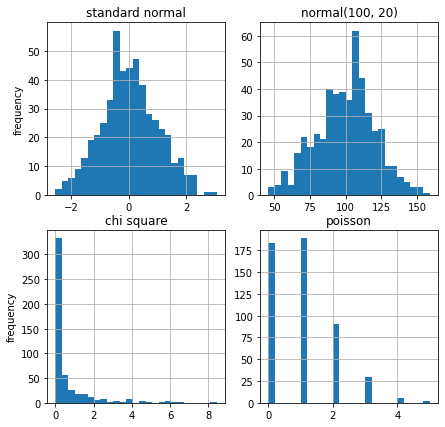

In [10]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize = (7,7))

ax1.hist(rn1, bins=25, stacked =True)
ax1.set_title('standard normal')
ax1.set_ylabel('frequency')
ax1.grid(True)

ax2.hist(rn2, bins=25)
ax2.set_title('normal(100, 20)')
ax2.grid(True)

ax3.hist(rn3, bins=25)
ax3.set_title('chi square')
ax3.set_ylabel('frequency')
ax3.grid(True)

ax4.hist(rn4, bins=25)
ax4.set_title('poisson')
ax4.grid(True)

### 10.2 시뮬레이션
#### 10.2.1 확률 변수

In [11]:
S0 = 100 # 초깃값
r = .05 # 고정 단기 이자율
sigma = .25 # 고정 변동성
T = 2.0 # 시간(연)
I = 10000 # 난수의 수
ST1 = S0 * np.exp((r- 0.5*sigma**2) *T + sigma * np.sqrt(T) * npr.standard_normal(I))


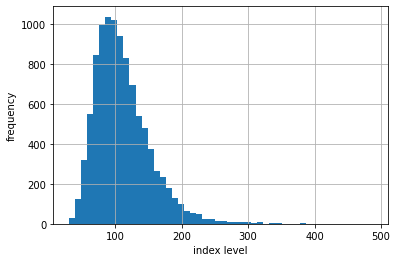

In [12]:
plt.hist(ST1, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

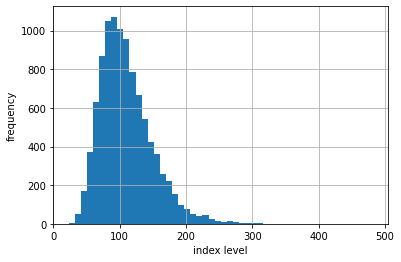

In [14]:
ST2 = S0 * npr.lognormal((r- 0.5*sigma**2) *T, sigma * np.sqrt(T), size = I)
plt.hist(ST2, bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [15]:
import scipy.stats as scs

def print_statistics(a1, a2):
    """
    필요한 통계치를 출력
    """
    stat1 = scs.describe(a1)
    stat2 = scs.describe(a2)
    print("%14s %14s %14s" % ('statistic', 'data set 1', 'data set 2'))
    print(45*'-')
    print("%14s %14.3f %14.3f" % ('size', stat1[0], stat2[0]))
    print("%14s %14.3f %14.3f" % ('min', stat1[1][0], stat2[1][0]))
    print("%14s %14.3f %14.3f" % ('max', stat1[1][1], stat2[1][1]))
    print("%14s %14.3f %14.3f" % ('mean', stat1[2], stat2[2]))
    print("%14s %14.3f %14.3f" % ('std', np.sqrt(stat1[3]), np.sqrt(stat2[3])))
    print("%14s %14.3f %14.3f" % ('skew', stat1[4], stat2[4]))
    print("%14s %14.3f %14.3f" % ('kurtosis', stat1[5], stat2[5]))
    
    
print_statistics(ST1, ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         29.676         22.860
           max        487.819        481.698
          mean        110.868        109.705
           std         41.612         39.599
          skew          1.289          1.133
      kurtosis          3.329          2.602


#### 10.2.2 확률 과정
#### 확률 과정 : 확률 변수의 수열, 각 단계의 샘플이 독립적이 아니고 이전의 결과들에 의존
#### 마코프 확률 과정 : 미래의 값이 바로 전의 과거 값에만 의존하고 그보다 더 과거의 값들이나 전체 경로에는 의존하지 않음, 무기억성 확률 과정

#### 기하브라운 운동 모형

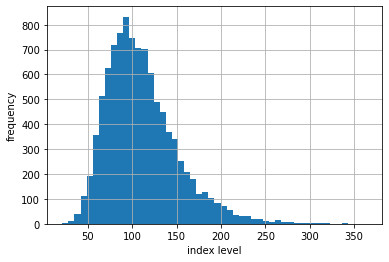

In [16]:
I = 10000
M = 50
dt = T / M
S = np.zeros((M+1, I))
S[0] = S0
for t in range(1, M+1):
    S[t] = S[t-1] * np.exp((r-.5*sigma**2) * dt + sigma * np.sqrt(dt) * npr.standard_normal(I))
    

plt.hist(S[-1], bins=50)
plt.xlabel('index level')
plt.ylabel('frequency')
plt.grid(True)

In [17]:
print_statistics(S[-1], ST2)

     statistic     data set 1     data set 2
---------------------------------------------
          size      10000.000      10000.000
           min         21.129         22.860
           max        364.348        481.698
          mean        111.017        109.705
           std         40.634         39.599
          skew          1.148          1.133
      kurtosis          2.226          2.602


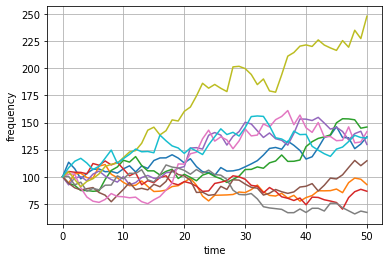

In [19]:
plt.plot(S[:, :10], lw=1.5)
plt.xlabel('time')
plt.ylabel('frequency')
plt.grid(True)

#### 제곱근 확산 모형
#### 확률적 변동성 모형
#### 점프 확산

#### 10.2.3 분산 감소

In [20]:
print("%15s %15s" % ('Mean', 'Std.Deviation'))
print(45*'-')
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(i ** 2 * 10000)
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean   Std.Deviation
---------------------------------------------
-0.011870394558  1.008752430725
-0.002815667298  1.002729536352
-0.003847776704  1.000594044165
-0.003058113374  1.001086345326
-0.001685126538  1.001630849589
-0.001175212007  1.001347684642
-0.000803969036  1.000159081432
-0.000601970954  0.999506522127
-0.000147787693  0.999571756099
-0.000313035581  0.999646153704
-0.000178447061  0.999677277878
 0.000096501709  0.999684346792
-0.000135677013  0.999823841902
-0.000015726986  0.999906493379
-0.000039368519  1.000063091949


In [23]:
#### 대조 변수 활용 : 난수를 원하는 수의 절반만 생성하고 숫자의 부호를 반대로 한 난수를 추가로 포함, 1차 모멘트만 고정
sn = npr.standard_normal(int(10000 / 2))
sn = np.concatenate((sn, -sn))

print("%15s %15s" % ('Mean', 'Std.Deviation'))
print(45*'-')
for i in range(1, 31, 2):
    npr.seed(1000)
    sn = npr.standard_normal(int(i ** 2 * 10000 / 2))
    sn = np.concatenate((sn, -sn))
    print("%15.12f %15.12f" % (sn.mean(), sn.std()))

           Mean   Std.Deviation
---------------------------------------------
 0.000000000000  1.009653753942
-0.000000000000  1.000413716783
 0.000000000000  1.002925061201
-0.000000000000  1.000755212673
 0.000000000000  1.001636910076
-0.000000000000  1.000726758438
-0.000000000000  1.001621265149
 0.000000000000  1.001203722778
-0.000000000000  1.000556669784
 0.000000000000  1.000113464185
-0.000000000000  0.999435175324
 0.000000000000  0.999356961431
-0.000000000000  0.999641436845
-0.000000000000  0.999642768905
-0.000000000000  0.999638303451


In [24]:
#### 모멘트 정합 : 1, 2차 모멘트를 같이 수정 가능
sn = npr.standard_normal(10000)
sn_new = (sn - sn.mean()) / sn.std()

In [27]:
def gen_sn(M, I, anti_paths=True, mo_match=True):
    """
    시뮬레이션용 난수를 생성하는 함수
    """
    if anti_paths:
        sn  = npr.standard_normal((M+1, int(I/2)))
        sn = np.concatenate((sn, -sn), axis=1)
    else:
        sn = npr.standard_normal((M+1, I))
        if mo_match:
            sn = (sn-sn.mean()) / sn.std()
            
    return sn

### 10.3 가치평가
#### 몬테카를로 시뮬레이션의 가장 중요한 응용은 조건부 청구권의 가치 평가 
#### 조건부 청구권의 가치 : 위험 중립 또는 마틴게일 측도 하에서 기대 페이오프를 할인
#### 위험 중립 측도 : 주식, 지수 등의 모든 위험 요인이 무위험 단기 이자율에 따라 증가하도록 하는 확률 측도
#### 10.3.1 유러피안 옵션
#### 10.3.2 아메리칸 옵션

### 10.4 위험 측도 
#### 10.4.1 VaR
#### 어떤 확률적인 신뢰도 하에서 특정 시간 내에 발생할 수 있는 화폐로 환산한 손실 가능 금액
#### 10.4.2 CVA
#### 거래 상대방이 이행의무를 다하지 않을 수 있는 가능성을 고려한 위험 측도